### Visualizing Groundwater Variation Across KS

**Name**: Bre Waterman <br/>
**Semester**: Spring 2019 <br/>
**Project area**: Hydrogeology

## Objectives & Outcomes
The goal is to construct code using python that will calculate the average water level depth over time for an individual well, and apply this code to calculate the water level averages to other wells located across the Kansas precipitation gradient to understand and quantify changes in groundwater levels over time. The code should be able to process txt files extracted from USGS, calculate averages of groundwater levels for other wells. After visually representing the change over time for one well, the next step is to create a plot with different wells, using longitude as x-axis, in order to show the variation in groundwater levels from select locations across KS where my research will be conducted (shallow alluvial aquifers for in/near Lawrence KS, Manhattan/Riley KS, and Hays).

## Background
In an agriculturally driven state such as Kansas, water availability is invaluable to the sustainability and growth of both the population and economy. The research for my thesis specifically aims to characterize the variation of water availability and quality across the Kansas aridity gradient. Calculating the water level averages of wells across Kansas would be beneficial towards understanding variation in groundwater levels over time, influence on surface water and potentially give insight on future availabilty trends as well as find relationships between precipitation.

#### Import cell

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#### Cells to import data & handle extra/unneccesary rows

In [2]:
data = "/Users/brewaterman/Desktop/GroundwaterVariation/gwlevels"
df = pd.read_csv(data, sep = "\t", comment = "#")
df.head(2)

,agency_cd,site_no,site_tp_cd,lev_dt,lev_tm,lev_tz_cd,lev_va,sl_lev_va,sl_datum_cd,lev_status_cd,lev_agency_cd,lev_dt_acy_cd,lev_acy_cd,lev_src_cd,lev_meth_cd,lev_age_cd
0,5s,15s,6s,10d,5d,5s,12s,12s,10s,1s,5s,1s,1s,1s,1s,1s
1,USGS,390006095132301,GW,1999-01-05,NaN,NaN,NaN,814.50,NGVD29,NaN,USGS,D,2,S,S,A


In [3]:
df[["site_no", "lev_dt", "sl_lev_va", "sl_datum_cd"]]
wellData = df.drop(0)
wellData.head(5)

,agency_cd,site_no,site_tp_cd,lev_dt,lev_tm,lev_tz_cd,lev_va,sl_lev_va,sl_datum_cd,lev_status_cd,lev_agency_cd,lev_dt_acy_cd,lev_acy_cd,lev_src_cd,lev_meth_cd,lev_age_cd
1,USGS,390006095132301,GW,1999-01-05,NaN,NaN,NaN,814.50,NGVD29,NaN,USGS,D,2,S,S,A
2,USGS,390006095132301,GW,1999-01-10,NaN,NaN,NaN,814.33,NGVD29,NaN,USGS,D,2,S,S,A
3,USGS,390006095132301,GW,1999-01-15,NaN,NaN,NaN,814.20,NGVD29,NaN,USGS,D,2,S,S,A
4,USGS,390006095132301,GW,1999-01-20,NaN,NaN,NaN,814.11,NGVD29,NaN,USGS,D,2,S,S,A
5,USGS,390006095132301,GW,1999-01-25,NaN,NaN,NaN,813.95,NGVD29,NaN,USGS,D,2,S,S,A


In [4]:
#need to convert data types from objects to float/datetime
wellData.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 253 entries, 1 to 253
Data columns (total 16 columns):
agency_cd        253 non-null object
site_no          253 non-null object
site_tp_cd       253 non-null object
lev_dt           253 non-null object
lev_tm           73 non-null object
lev_tz_cd        73 non-null object
lev_va           0 non-null object
sl_lev_va        253 non-null object
sl_datum_cd      253 non-null object
lev_status_cd    0 non-null object
lev_agency_cd    253 non-null object
lev_dt_acy_cd    253 non-null object
lev_acy_cd       253 non-null object
lev_src_cd       253 non-null object
lev_meth_cd      253 non-null object
lev_age_cd       253 non-null object
dtypes: object(16)
memory usage: 33.6+ KB


#### Convert data to float 

In [5]:
wellData = wellData.astype({"sl_lev_va": float})

#### Changing lev_dt (dates of gw levels) to years using pd.to_datetime 

In [6]:
dates = pd.to_datetime(wellData["lev_dt"])
years = dates.dt.year

#adding transformed data as a column back into df
wellData["Years"] = years
wellData.head()

,agency_cd,site_no,site_tp_cd,lev_dt,lev_tm,lev_tz_cd,lev_va,sl_lev_va,sl_datum_cd,lev_status_cd,lev_agency_cd,lev_dt_acy_cd,lev_acy_cd,lev_src_cd,lev_meth_cd,lev_age_cd,Years
1,USGS,390006095132301,GW,1999-01-05,NaN,NaN,NaN,814.50,NGVD29,NaN,USGS,D,2,S,S,A,1999
2,USGS,390006095132301,GW,1999-01-10,NaN,NaN,NaN,814.33,NGVD29,NaN,USGS,D,2,S,S,A,1999
3,USGS,390006095132301,GW,1999-01-15,NaN,NaN,NaN,814.20,NGVD29,NaN,USGS,D,2,S,S,A,1999
4,USGS,390006095132301,GW,1999-01-20,NaN,NaN,NaN,814.11,NGVD29,NaN,USGS,D,2,S,S,A,1999
5,USGS,390006095132301,GW,1999-01-25,NaN,NaN,NaN,813.95,NGVD29,NaN,USGS,D,2,S,S,A,1999


In [7]:
#data types are in proper format now
wellData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 253 entries, 1 to 253
Data columns (total 17 columns):
agency_cd        253 non-null object
site_no          253 non-null object
site_tp_cd       253 non-null object
lev_dt           253 non-null object
lev_tm           73 non-null object
lev_tz_cd        73 non-null object
lev_va           0 non-null object
sl_lev_va        253 non-null float64
sl_datum_cd      253 non-null object
lev_status_cd    0 non-null object
lev_agency_cd    253 non-null object
lev_dt_acy_cd    253 non-null object
lev_acy_cd       253 non-null object
lev_src_cd       253 non-null object
lev_meth_cd      253 non-null object
lev_age_cd       253 non-null object
Years            253 non-null int64
dtypes: float64(1), int64(1), object(15)
memory usage: 35.6+ KB


In [8]:
#number of years active for well
yearsactive = years.unique()
yearsactive.size

17

### Basic stats of data set 

In [9]:
yearsCalc = wellData.groupby('Years')
yearsCalc.agg(['count', 'min', 'max', 'std', 'mean']).head(5)

sl_lev_va                                      
          count     min     max       std        mean
Years                                                
1999         83  810.46  816.94  1.952936  813.259518
2000         63  807.96  810.63  0.807622  809.583016
2001         13  808.54  813.34  1.389649  810.633846
2002         11  806.98  810.48  1.240552  808.350909
2003          7  805.75  806.99  0.488599  806.394286

In [10]:
averageperyear = yearsCalc['sl_lev_va'].mean().sort_values(ascending=False)
print(averageperyear)

Years
1999    813.259518
2009    812.318000
2010    812.147143
2008    811.379000
2005    810.997500
2001    810.633846
2011    809.852500
2000    809.583016
2007    809.440000
2006    809.338889
2015    809.247500
2002    808.350909
2004    807.865000
2014    807.554286
2012    807.195000
2003    806.394286
2013    806.076000
Name: sl_lev_va, dtype: float64


### Figure for individual well over time

Text(0.5, 1.0, 'Average Well Datum Value per Year')

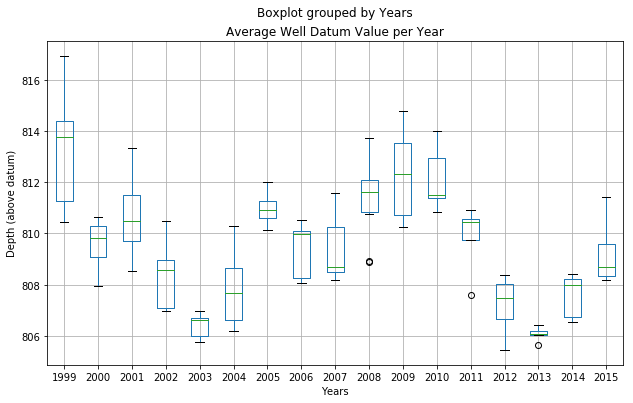

In [11]:
ax1 = wellData[['sl_lev_va', 'Years']].boxplot(by='Years', figsize=(10, 6))
ax1.set_xlabel('Years')
ax1.set_ylabel('Depth (above datum)')
ax1.set_title('Average Well Datum Value per Year')
#plt.savefig('gwlevelsLawrence.jpg')

### Importing datafile with lat/long and surface elevation data

In [12]:
#New goal: box plot for each active year for well and project along lat long 'x axis' across 
info = "/Users/brewaterman/Desktop/GroundwaterVariation/Lawrence"
dfinfo = pd.read_csv(info, sep = "\t", comment = "#")
dfinfo

,agency_cd,site_no,station_nm,site_tp_cd,dec_lat_va,dec_long_va,coord_meth_cd,coord_acy_cd,coord_datum_cd,dec_coord_datum_cd,...,basin_cd,nat_aqfr_cd,aqfr_cd,aqfr_type_cd,well_depth_va,hole_depth_va,depth_src_cd,gw_begin_date,gw_end_date,gw_count_nu
0,5s,15s,50s,7s,16n,16n,1s,1s,10s,10s,...,2s,10s,8s,1s,8s,8s,1s,10d,10d,8n
1,USGS,390006095132301,12S 20E 17CCB 01 LAWRENCE AIRPORT WELL,GW,39.00166825,-95.22330530,M,T,NAD27,NAD83,...,06,N100ALLUVL,112NWMN,NaN,53.0,NaN,M,1952-02-01,2015-08-12,3431


In [13]:
#pulling out neccessary rows
data = dfinfo.drop(0)
data

,agency_cd,site_no,station_nm,site_tp_cd,dec_lat_va,dec_long_va,coord_meth_cd,coord_acy_cd,coord_datum_cd,dec_coord_datum_cd,...,basin_cd,nat_aqfr_cd,aqfr_cd,aqfr_type_cd,well_depth_va,hole_depth_va,depth_src_cd,gw_begin_date,gw_end_date,gw_count_nu
1,USGS,390006095132301,12S 20E 17CCB 01 LAWRENCE AIRPORT WELL,GW,39.00166825,-95.22330530,M,T,NAD27,NAD83,...,06,N100ALLUVL,112NWMN,NaN,53.0,NaN,M,1952-02-01,2015-08-12,3431


#### Condense dataframe (not sure if neccessary I just like to do it)

In [14]:
wellInfo = data[["site_no", "dec_lat_va", "dec_long_va", "alt_va", "well_depth_va", "nat_aqfr_cd"]]
wellInfo

,site_no,dec_lat_va,dec_long_va,alt_va,well_depth_va,nat_aqfr_cd
1,390006095132301,39.00166825,-95.22330530,830.29,53.0,N100ALLUVL


#### Merge orignal df with new data frame with lat and long, aquifer type, etc. 

In [15]:
dftotal = pd.merge(wellData, wellInfo, on="site_no", how='outer')
dftotal.head(5)

,agency_cd,site_no,site_tp_cd,lev_dt,lev_tm,lev_tz_cd,lev_va,sl_lev_va,sl_datum_cd,lev_status_cd,...,lev_acy_cd,lev_src_cd,lev_meth_cd,lev_age_cd,Years,dec_lat_va,dec_long_va,alt_va,well_depth_va,nat_aqfr_cd
0,USGS,390006095132301,GW,1999-01-05,NaN,NaN,NaN,814.50,NGVD29,NaN,...,2,S,S,A,1999,39.00166825,-95.22330530,830.29,53.0,N100ALLUVL
1,USGS,390006095132301,GW,1999-01-10,NaN,NaN,NaN,814.33,NGVD29,NaN,...,2,S,S,A,1999,39.00166825,-95.22330530,830.29,53.0,N100ALLUVL
2,USGS,390006095132301,GW,1999-01-15,NaN,NaN,NaN,814.20,NGVD29,NaN,...,2,S,S,A,1999,39.00166825,-95.22330530,830.29,53.0,N100ALLUVL
3,USGS,390006095132301,GW,1999-01-20,NaN,NaN,NaN,814.11,NGVD29,NaN,...,2,S,S,A,1999,39.00166825,-95.22330530,830.29,53.0,N100ALLUVL
4,USGS,390006095132301,GW,1999-01-25,NaN,NaN,NaN,813.95,NGVD29,NaN,...,2,S,S,A,1999,39.00166825,-95.22330530,830.29,53.0,N100ALLUVL


#### Convert data objects to usable types (float) 

In [16]:
dftotal = dftotal.astype({"alt_va": float, 
                        "dec_lat_va": float,
                        "dec_long_va": float,
                        "sl_lev_va": float})
dftotal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 253 entries, 0 to 252
Data columns (total 22 columns):
agency_cd        253 non-null object
site_no          253 non-null object
site_tp_cd       253 non-null object
lev_dt           253 non-null object
lev_tm           73 non-null object
lev_tz_cd        73 non-null object
lev_va           0 non-null object
sl_lev_va        253 non-null float64
sl_datum_cd      253 non-null object
lev_status_cd    0 non-null object
lev_agency_cd    253 non-null object
lev_dt_acy_cd    253 non-null object
lev_acy_cd       253 non-null object
lev_src_cd       253 non-null object
lev_meth_cd      253 non-null object
lev_age_cd       253 non-null object
Years            253 non-null int64
dec_lat_va       253 non-null float64
dec_long_va      253 non-null float64
alt_va           253 non-null float64
well_depth_va    253 non-null object
nat_aqfr_cd      253 non-null object
dtypes: float64(4), int64(1), object(17)
memory usage: 45.5+ KB


#### New column that has depth from surface

In [17]:

depthfromSurface = (dftotal.alt_va - dftotal.sl_lev_va)
dftotal['va_from_surface'] = depthfromSurface
dftotal.head(5)

,agency_cd,site_no,site_tp_cd,lev_dt,lev_tm,lev_tz_cd,lev_va,sl_lev_va,sl_datum_cd,lev_status_cd,...,lev_src_cd,lev_meth_cd,lev_age_cd,Years,dec_lat_va,dec_long_va,alt_va,well_depth_va,nat_aqfr_cd,va_from_surface
0,USGS,390006095132301,GW,1999-01-05,NaN,NaN,NaN,814.50,NGVD29,NaN,...,S,S,A,1999,39.001668,-95.223305,830.29,53.0,N100ALLUVL,15.79
1,USGS,390006095132301,GW,1999-01-10,NaN,NaN,NaN,814.33,NGVD29,NaN,...,S,S,A,1999,39.001668,-95.223305,830.29,53.0,N100ALLUVL,15.96
2,USGS,390006095132301,GW,1999-01-15,NaN,NaN,NaN,814.20,NGVD29,NaN,...,S,S,A,1999,39.001668,-95.223305,830.29,53.0,N100ALLUVL,16.09
3,USGS,390006095132301,GW,1999-01-20,NaN,NaN,NaN,814.11,NGVD29,NaN,...,S,S,A,1999,39.001668,-95.223305,830.29,53.0,N100ALLUVL,16.18
4,USGS,390006095132301,GW,1999-01-25,NaN,NaN,NaN,813.95,NGVD29,NaN,...,S,S,A,1999,39.001668,-95.223305,830.29,53.0,N100ALLUVL,16.34


In [18]:
#dftotal.astype({'va_from_surface': int})
#dftotal.info()

In [19]:
yearsNew = dftotal.groupby('Years')
yearsNew.agg(['count', 'min', 'max', 'std', 'mean']).head(5)
#df.quantile()

sl_lev_va                                       dec_lat_va             \
          count     min     max       std        mean      count        min   
Years                                                                         
1999         83  810.46  816.94  1.952936  813.259518         83  39.001668   
2000         63  807.96  810.63  0.807622  809.583016         63  39.001668   
2001         13  808.54  813.34  1.389649  810.633846         13  39.001668   
2002         11  806.98  810.48  1.240552  808.350909         11  39.001668   
2003          7  805.75  806.99  0.488599  806.394286          7  39.001668   

                                    ...     alt_va                       \
             max  std       mean    ...      count     min     max  std   
Years                               ...                                   
1999   39.001668  0.0  39.001668    ...         83  830.29  830.29  0.0   
2000   39.001668  0.0  39.001668    ...         63  830.29  830.29  0.0   
2001   39.001668  0.0  39.001668    ...         13  830.29  830.29  0.0   
2002   39.001668  0.0  39.001668    ...         11  830.29  830.29  0.0   
2003   39.001668  0.0  39.001668    ...          7  830.29  830.29  0.0   

              va_from_surface                                     
         mean           count    min    max       std       mean  
Years                                                             
1999   830.29              83  13.35  19.83  1.952936  17.030482  
2000   830.29              63  19.66  22.33  0.807622  20.706984  
2001   830.29              13  16.95  21.75  1.389649  19.656154  
2002   830.29              11  19.81  23.31  1.240552  21.939091  
2003   830.29               7  23.30  24.54  0.488599  23.895714  

[5 rows x 25 columns]

In [20]:
averageperyearSV = yearsNew["va_from_surface"].apply(np.mean)
print(averageperyearSV)

Years
1999    17.030482
2000    20.706984
2001    19.656154
2002    21.939091
2003    23.895714
2004    22.425000
2005    19.292500
2006    20.951111
2007    20.850000
2008    18.911000
2009    17.972000
2010    18.142857
2011    20.437500
2012    23.095000
2013    24.214000
2014    22.735714
2015    21.042500
Name: va_from_surface, dtype: float64


### Making graph with correct/more common axis

Text(0.5, 1.0, 'Average Well Level per Year')

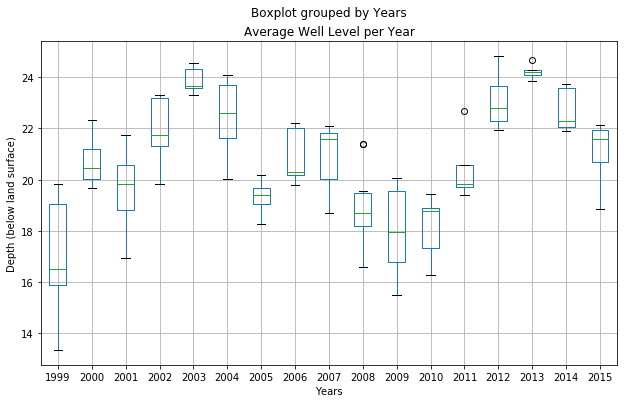

In [21]:
ax1 = dftotal[['va_from_surface', 'Years']].boxplot(by='Years', figsize=(10, 6))
ax1.set_xlabel('Years')
ax1.set_ylabel('Depth (below land surface)')
ax1.set_title('Average Well Level per Year')
#plt.savefig('gwlevelsLawrence.jpg')

#### Next steps: Boxplot for average single well level for each year, at specific site/longitude, to compare to other alluvial wells/years across KS

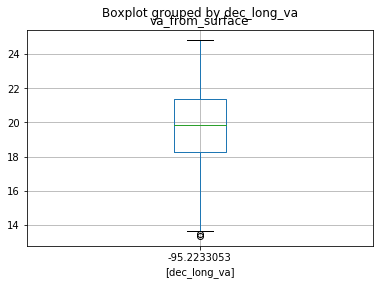

In [22]:
dftotal.boxplot(column=['va_from_surface'], by=['dec_long_va'])

In [23]:
# next steps are to get all wells with water chem., separate by well name and year and do same thing